In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Loading data

In [2]:
lyon_ml = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\Lyon.csv')

In [3]:
lyon_ml.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,conditions,description,date,pm25,pm10,o3,no2,so2,co,City
0,45.7592,4.82966,Lyon,2014-01-01,1388530800,11.9,8.2,9.8,68.37,0.33,...,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,2014-01-01,26.0,10.0,23.0,14.0,NaN,NaN,Lyon
1,45.7592,4.82966,Lyon,2014-01-02,1388617200,12.1,8.4,10.5,78.29,11.94,...,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,2014-01-02,31.0,11.0,10.0,15.0,NaN,NaN,Lyon
2,45.7592,4.82966,Lyon,2014-01-03,1388703600,10.7,8.5,10.0,86.57,15.77,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,2014-01-03,36.0,7.0,15.0,11.0,NaN,NaN,Lyon
3,45.7592,4.82966,Lyon,2014-01-04,1388790000,11.6,5.3,9.5,86.54,19.85,...,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,2014-01-04,23.0,10.0,20.0,15.0,NaN,NaN,Lyon
4,45.7592,4.82966,Lyon,2014-01-05,1388876400,9.6,1.1,5.3,83.87,14.64,...,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,2014-01-05,33.0,15.0,17.0,16.0,1.0,NaN,Lyon


I will load the clean air pollution for Lyon and concatanate it to the df, but first I will drop the columns that I will replace with clean data

In [4]:
lyon_ml.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'],
      dtype='object')

In [5]:
lyon_ml.drop(columns=['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'], inplace=True)

In [6]:
lyon_clean = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Lyon_clean_for_ts.csv')

In [7]:
lyon_clean.drop(columns='datetime', inplace=True)

In [8]:
lyon_ml = pd.concat([lyon_ml,lyon_clean], axis=1)


In [9]:
lyon_ml.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,visibility,solarradiation,solarenergy,uvindex,conditions,description,pm25,pm10,o3,no2
0,45.7592,4.82966,Lyon,2014-01-01,1388530800,11.9,8.2,9.8,68.37,0.33,...,55.1,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,26.0,10.0,23.0,14.0
1,45.7592,4.82966,Lyon,2014-01-02,1388617200,12.1,8.4,10.5,78.29,11.94,...,46.5,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,31.0,11.0,10.0,15.0
2,45.7592,4.82966,Lyon,2014-01-03,1388703600,10.7,8.5,10.0,86.57,15.77,...,30.3,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,36.0,7.0,15.0,11.0
3,45.7592,4.82966,Lyon,2014-01-04,1388790000,11.6,5.3,9.5,86.54,19.85,...,33.2,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,23.0,10.0,20.0,15.0
4,45.7592,4.82966,Lyon,2014-01-05,1388876400,9.6,1.1,5.3,83.87,14.64,...,29.0,NaN,NaN,0.0,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,33.0,15.0,17.0,16.0


Dropping columns that diplicate information and that won't be needed for the analysis or that were dropped for Paris data so at the end I ahve the same dataset for analysis

In [10]:
lyon_ml.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'pm25', 'pm10', 'o3', 'no2'],
      dtype='object')

In [11]:
cols_to_drop = ['latitude', 'longitude', 'address', 'datetimeEpoch','description','snow', 'snowdepth','solarradiation', 'solarenergy','windgust']

In [12]:
lyon_ml.drop(columns=cols_to_drop, inplace=True)

In [13]:
lyon_ml.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
0,2014-01-01,11.9,8.2,9.8,68.37,0.33,8.33,42.0,1014.5,70.2,55.1,0.0,"Rain, Partially cloudy",26.0,10.0,23.0,14.0
1,2014-01-02,12.1,8.4,10.5,78.29,11.94,37.50,35.5,1010.2,59.2,46.5,0.0,"Rain, Partially cloudy",31.0,11.0,10.0,15.0
2,2014-01-03,10.7,8.5,10.0,86.57,15.77,58.33,25.4,1015.3,88.8,30.3,0.0,"Rain, Partially cloudy",36.0,7.0,15.0,11.0
3,2014-01-04,11.6,5.3,9.5,86.54,19.85,66.67,31.4,1007.3,88.4,33.2,0.0,"Rain, Partially cloudy",23.0,10.0,20.0,15.0
4,2014-01-05,9.6,1.1,5.3,83.87,14.64,25.00,14.3,1014.0,69.0,29.0,0.0,"Rain, Partially cloudy",33.0,15.0,17.0,16.0


Missing values

In [14]:
lyon_ml.shape

(2922, 17)

In [15]:
lyon_ml.isna().sum()

datetime       0
tempmax        0
tempmin        0
temp           0
humidity       0
precip         1
precipcover    1
windspeed      0
pressure       1
cloudcover     0
visibility     0
uvindex        0
conditions     0
pm25           0
pm10           0
o3             0
no2            0
dtype: int64

I start by checking missing values on precipitation

In [16]:
lyon_ml.loc[lyon_ml.precip.isna()]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2607,2021-02-20,16.6,10.6,12.8,62.5,NaN,NaN,44.2,1018.5,4.3,11.2,6.0,Clear,42.0,14.0,32.0,3.0


In [17]:
#It seems that there was no percipiatation that day as conditions say paritally cloudly, so I can fill the values of precip and precipcover with 0
lyon_ml.loc[lyon_ml.precip.isna()] = lyon_ml.loc[lyon_ml.precip.isna()].fillna(0)

In [18]:
lyon_ml.isna().sum()

datetime       0
tempmax        0
tempmin        0
temp           0
humidity       0
precip         0
precipcover    0
windspeed      0
pressure       1
cloudcover     0
visibility     0
uvindex        0
conditions     0
pm25           0
pm10           0
o3             0
no2            0
dtype: int64

Let's look at pressure

In [19]:
lyon_ml.loc[lyon_ml.pressure.isna()]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2599,2021-02-12,0.7,-2.3,-1.0,85.06,0.0,0.0,14.8,NaN,93.9,5.7,2.0,Overcast,108.0,27.0,21.0,6.0


In [20]:
lyon_ml.loc[[2598,2599,2600]]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2598,2021-02-11,2.8,-1.3,0.4,75.10,0.01,4.17,15.7,1018.6,92.6,9.2,2.0,"Rain, Overcast",91.0,39.0,21.0,8.0
2599,2021-02-12,0.7,-2.3,-1.0,85.06,0.00,0.00,14.8,NaN,93.9,5.7,2.0,Overcast,108.0,27.0,21.0,6.0
2600,2021-02-13,-1.0,-4.1,-2.1,72.40,0.00,0.00,13.9,1031.2,96.6,11.6,4.0,Overcast,83.0,26.0,27.0,6.0


In [21]:
#I can assume that the pressure on that day was not that diffreent as the day after as they have the same conditions, so I will fill these values with the values for the day after 

In [22]:
lyon_ml=lyon_ml.fillna(method='bfill')

In [23]:
lyon_ml.loc[[2598,2599,2600]]

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,uvindex,conditions,pm25,pm10,o3,no2
2598,2021-02-11,2.8,-1.3,0.4,75.10,0.01,4.17,15.7,1018.6,92.6,9.2,2.0,"Rain, Overcast",91.0,39.0,21.0,8.0
2599,2021-02-12,0.7,-2.3,-1.0,85.06,0.00,0.00,14.8,1031.2,93.9,5.7,2.0,Overcast,108.0,27.0,21.0,6.0
2600,2021-02-13,-1.0,-4.1,-2.1,72.40,0.00,0.00,13.9,1031.2,96.6,11.6,4.0,Overcast,83.0,26.0,27.0,6.0


In [24]:
'''
Interestingly, the data on pressure was missing on the same day in Paris. Thus maybe it was connected to some kind of malefunction and this problem will be present for all of the cities
'''

'\nInterestingly, the data on pressure was missing on the same day in Paris. Thus maybe it was connected to some kind of malefunction and this problem will be present for all of the cities\n'

### Converting datetime into datetime format

In [25]:
lyon_ml.datetime= pd.to_datetime(lyon_ml.datetime)

In [26]:
lyon_ml.dtypes

datetime       datetime64[ns]
tempmax               float64
tempmin               float64
temp                  float64
humidity              float64
precip                float64
precipcover           float64
windspeed             float64
pressure              float64
cloudcover            float64
visibility            float64
uvindex               float64
conditions             object
pm25                  float64
pm10                  float64
o3                    float64
no2                   float64
dtype: object

#### Encoding conditions

In [27]:
lyon_ml.conditions.value_counts()

Rain, Partially cloudy    1223
Clear                      699
Partially cloudy           567
Rain, Overcast             258
Rain                       129
Overcast                    41
Snow, Partially cloudy       4
Snow, Overcast               1
Name: conditions, dtype: int64

In [28]:
lyon_ml.conditions.unique()

array(['Rain, Partially cloudy', 'Partially cloudy', 'Rain, Overcast',
       'Clear', 'Overcast', 'Rain', 'Snow, Partially cloudy',
       'Snow, Overcast'], dtype=object)

In [29]:
event_list = ['Clear', 'Partially cloudy', 'Rain', 'Snow', 'Overcast']

# I am creating empty columns that will be populated with values if that event happend that day 
for event in event_list:
	lyon_ml[event]=0

for event in event_list:
	lyon_ml[event] = lyon_ml['conditions'].str.contains(event).astype(int)



In [30]:
lyon_ml.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,...,conditions,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast
0,2014-01-01,11.9,8.2,9.8,68.37,0.33,8.33,42.0,1014.5,70.2,...,"Rain, Partially cloudy",26.0,10.0,23.0,14.0,0,1,1,0,0
1,2014-01-02,12.1,8.4,10.5,78.29,11.94,37.50,35.5,1010.2,59.2,...,"Rain, Partially cloudy",31.0,11.0,10.0,15.0,0,1,1,0,0
2,2014-01-03,10.7,8.5,10.0,86.57,15.77,58.33,25.4,1015.3,88.8,...,"Rain, Partially cloudy",36.0,7.0,15.0,11.0,0,1,1,0,0
3,2014-01-04,11.6,5.3,9.5,86.54,19.85,66.67,31.4,1007.3,88.4,...,"Rain, Partially cloudy",23.0,10.0,20.0,15.0,0,1,1,0,0
4,2014-01-05,9.6,1.1,5.3,83.87,14.64,25.00,14.3,1014.0,69.0,...,"Rain, Partially cloudy",33.0,15.0,17.0,16.0,0,1,1,0,0


In [31]:
#Now I can drop coditions column
lyon_ml.drop(columns='conditions', inplace=True)

#### Extracting month and day information

In [32]:
#As in the model I don't need the exact day only the information about the month and day of the week, as these propabbly influence air pollution eg. higher pollution for winter months, lower pollution during weekends etc

lyon_ml['month']=lyon_ml.datetime.dt.month
lyon_ml['day_of_week'] = lyon_ml.datetime.dt.dayofweek


In [33]:
# Creating a file for EDA which will be used in the part 7 of the project
lyon_ml.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\07 - EDA\Lyon_for_EDA.csv', index_label=False)

In [34]:
#Now I can drop datetime column
lyon_ml.drop(columns='datetime', inplace=True)

### Correlation between columns

<AxesSubplot:>

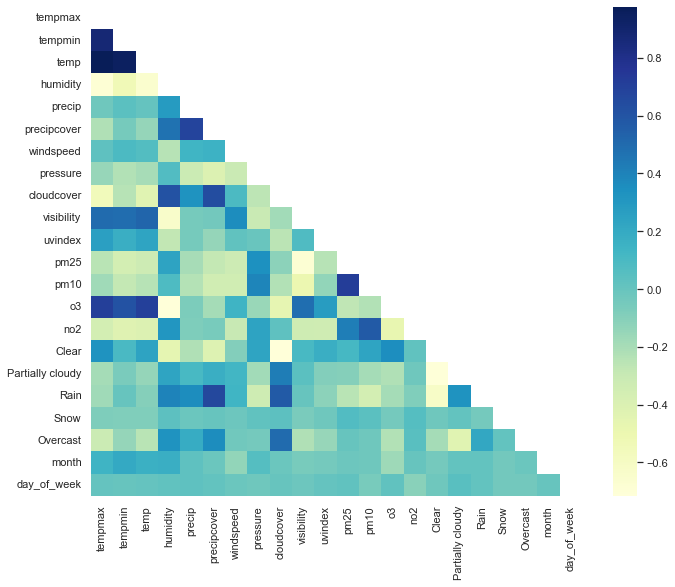

In [35]:
# I will drow correlation matrix as well as see values in the Table 
sns.set_theme(style="whitegrid")
# Compute the correlation matrix
corr = lyon_ml.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = 'YlGnBu'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

In [36]:
corr

,tempmax,tempmin,temp,humidity,precip,precipcover,windspeed,pressure,cloudcover,visibility,...,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
tempmax,1.000000,0.874972,0.976742,-0.685457,-0.024380,-0.225465,0.024748,-0.149636,-0.553192,0.494292,...,-0.176000,0.709796,-0.352488,0.335005,-0.189470,-0.175746,-0.079392,-0.318599,0.142211,0.009627
tempmin,0.874972,1.000000,0.946847,-0.531042,0.038028,-0.049295,0.090961,-0.227466,-0.240880,0.491647,...,-0.281899,0.607413,-0.421291,0.100752,-0.066953,0.000632,-0.086486,-0.147229,0.207708,-0.000114
temp,0.976742,0.946847,1.000000,-0.651656,0.010401,-0.145860,0.068640,-0.198661,-0.427806,0.525871,...,-0.245196,0.699340,-0.407181,0.241077,-0.141837,-0.097483,-0.083209,-0.250550,0.166924,0.005615
humidity,-0.685457,-0.531042,-0.651656,1.000000,0.282893,0.471885,-0.243606,0.075219,0.607249,-0.632667,...,0.089744,-0.715908,0.309605,-0.454708,0.233339,0.395106,0.037800,0.330299,0.174374,0.020436
precip,-0.024380,0.038028,0.010401,0.282893,1.000000,0.679887,0.132010,-0.315257,0.333978,-0.051513,...,-0.236361,-0.071596,-0.078597,-0.222255,0.105346,0.357171,-0.008873,0.185768,0.026503,0.025350
precipcover,-0.225465,-0.049295,-0.145860,0.471885,0.679887,1.000000,0.152339,-0.406294,0.636330,-0.035816,...,-0.341317,-0.191724,-0.060637,-0.416676,0.172676,0.664870,-0.000558,0.361169,-0.011322,0.017412
windspeed,0.024748,0.090961,0.068640,-0.243606,0.132010,0.152339,1.000000,-0.307465,0.091941,0.355548,...,-0.342425,0.141172,-0.298066,-0.093215,0.124500,0.136063,-0.020190,-0.032979,-0.138246,-0.009341
pressure,-0.149636,-0.227466,-0.198661,0.075219,-0.315257,-0.406294,-0.307465,1.000000,-0.262288,-0.305586,...,0.388321,-0.160240,0.241605,0.230235,-0.182135,-0.329502,0.018139,-0.047532,0.059999,-0.023543
cloudcover,-0.553192,-0.240880,-0.427806,0.607249,0.333978,0.636330,0.091941,-0.262288,1.000000,-0.183144,...,-0.230446,-0.460504,0.026625,-0.712304,0.421567,0.573155,0.032965,0.497972,-0.014450,-0.001796
visibility,0.494292,0.491647,0.525871,-0.632667,-0.051513,-0.035816,0.355548,-0.305586,-0.183144,1.000000,...,-0.492795,0.481763,-0.330440,0.105637,0.041462,0.000006,-0.067502,-0.223008,-0.058104,-0.020701


In [37]:
#There are a lot of columns that are highly correlated I will deal with them one by one.
# I can drop tempmax and tempmin as they are highly correlated to temp
# I can drop as well precipcover as it is correlated to precip

cols_to_drop = ['tempmax', 'tempmin', 'precipcover']
lyon_ml.drop(columns=cols_to_drop, inplace=True)


In [38]:
#Now I look at the correlation matrix again
lyon_ml.corr()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week
temp,1.000000,-0.651656,0.010401,0.068640,-0.198661,-0.427806,0.525871,0.230375,-0.319348,-0.245196,0.699340,-0.407181,0.241077,-0.141837,-0.097483,-0.083209,-0.250550,0.166924,0.005615
humidity,-0.651656,1.000000,0.282893,-0.243606,0.075219,0.607249,-0.632667,-0.273131,0.237973,0.089744,-0.715908,0.309605,-0.454708,0.233339,0.395106,0.037800,0.330299,0.174374,0.020436
precip,0.010401,0.282893,1.000000,0.132010,-0.315257,0.333978,-0.051513,-0.054623,-0.194642,-0.236361,-0.071596,-0.078597,-0.222255,0.105346,0.357171,-0.008873,0.185768,0.026503,0.025350
windspeed,0.068640,-0.243606,0.132010,1.000000,-0.307465,0.091941,0.355548,0.019777,-0.325566,-0.342425,0.141172,-0.298066,-0.093215,0.124500,0.136063,-0.020190,-0.032979,-0.138246,-0.009341
pressure,-0.198661,0.075219,-0.315257,-0.307465,1.000000,-0.262288,-0.305586,-0.004688,0.337973,0.388321,-0.160240,0.241605,0.230235,-0.182135,-0.329502,0.018139,-0.047532,0.059999,-0.023543
cloudcover,-0.427806,0.607249,0.333978,0.091941,-0.262288,1.000000,-0.183144,-0.259611,-0.119149,-0.230446,-0.460504,0.026625,-0.712304,0.421567,0.573155,0.032965,0.497972,-0.014450,-0.001796
visibility,0.525871,-0.632667,-0.051513,0.355548,-0.305586,-0.183144,1.000000,0.081464,-0.678894,-0.492795,0.481763,-0.330440,0.105637,0.041462,0.000006,-0.067502,-0.223008,-0.058104,-0.020701
uvindex,0.230375,-0.273131,-0.054623,0.019777,-0.004688,-0.259611,0.081464,1.000000,-0.241508,-0.136186,0.277389,-0.332435,0.170965,-0.088731,-0.117475,-0.024189,-0.152200,-0.045608,0.008472
pm25,-0.319348,0.237973,-0.194642,-0.325566,0.337973,-0.119149,-0.678894,-0.241508,1.000000,0.714728,-0.270320,0.417695,0.112139,-0.098509,-0.249004,0.074788,0.003437,-0.015513,0.019449
pm10,-0.245196,0.089744,-0.236361,-0.342425,0.388321,-0.230446,-0.492795,-0.136186,0.714728,1.000000,-0.230605,0.569685,0.232809,-0.188486,-0.352963,0.039679,-0.024699,-0.025840,-0.060748


<AxesSubplot:>

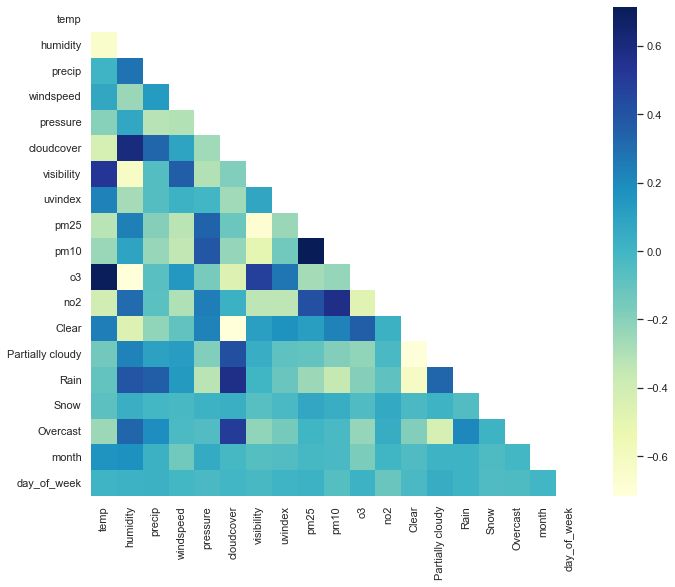

In [39]:
sns.set_theme(style="whitegrid")
# Compute the correlation matrix
corr = lyon_ml.corr()
f, ax = plt.subplots(figsize=(11, 9))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = 'YlGnBu'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap)

In [40]:
# I can leave rest of the columns like that as there is no correlation exceeding 90%

In [41]:
lyon_ml.pm25.max()

172.0

Creating a target variable 


In [42]:
lyon_ml['target']=pd.cut(lyon_ml.pm25, bins=[0,50,100,200], labels=[0,1,2])

In [43]:
lyon_ml['target'].value_counts()

0    1845
1     977
2     100
Name: target, dtype: int64

In [44]:
lyon_ml.head()

,temp,humidity,precip,windspeed,pressure,cloudcover,visibility,uvindex,pm25,pm10,o3,no2,Clear,Partially cloudy,Rain,Snow,Overcast,month,day_of_week,target
0,9.8,68.37,0.33,42.0,1014.5,70.2,55.1,0.0,26.0,10.0,23.0,14.0,0,1,1,0,0,1,2,0
1,10.5,78.29,11.94,35.5,1010.2,59.2,46.5,0.0,31.0,11.0,10.0,15.0,0,1,1,0,0,1,3,0
2,10.0,86.57,15.77,25.4,1015.3,88.8,30.3,0.0,36.0,7.0,15.0,11.0,0,1,1,0,0,1,4,0
3,9.5,86.54,19.85,31.4,1007.3,88.4,33.2,0.0,23.0,10.0,20.0,15.0,0,1,1,0,0,1,5,0
4,5.3,83.87,14.64,14.3,1014.0,69.0,29.0,0.0,33.0,15.0,17.0,16.0,0,1,1,0,0,1,6,0


In [45]:
lyon_ml.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\06 - ML\lyon_ready_for_ml.csv', index_label=False)